# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [5]:
## 獲取每一個欄位的標題，並且存進一個 array list

app_train.columns.values.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

* 看更多  [link](https://blog.csdn.net/tanzuozhev/article/details/76794841)

In [6]:
## 看資料的維度

app_train.shape

(307511, 122)

In [7]:
## 列出前 10 項

app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
## 挑選 前 200 列，並挑選特定某幾欄位的資料
## 並且 打印前 10 項

app_train2 = app_train.loc[:200, ['CODE_GENDER', 'DAYS_BIRTH', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL']]

app_train2.head(10)

,CODE_GENDER,DAYS_BIRTH,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL
0,M,-9461,N,Y,0,202500.0
1,F,-16765,N,N,0,270000.0
2,M,-19046,Y,Y,0,67500.0
3,F,-19005,N,Y,0,135000.0
4,M,-19932,N,Y,0,121500.0
5,M,-16941,N,Y,0,99000.0
6,F,-13778,Y,Y,1,171000.0
7,M,-18850,Y,Y,0,360000.0
8,F,-20099,N,Y,0,112500.0
9,M,-14469,N,Y,0,135000.0


In [9]:
## 計算每一行與列的相關係數

app_train2.corr()

,DAYS_BIRTH,CNT_CHILDREN,AMT_INCOME_TOTAL
DAYS_BIRTH,1.000000,0.303266,0.079720
CNT_CHILDREN,0.303266,1.000000,0.070292
AMT_INCOME_TOTAL,0.079720,0.070292,1.000000


* 看更多  [link](https://blog.csdn.net/brucewong0516/article/details/79933247)

In [11]:
app_train2['AMT_INCOME_TOTAL'].describe()

count       201.000000
mean     164080.020672
std       84121.037687
min       38419.155000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      540000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B60E317128>,
      dtype=object)

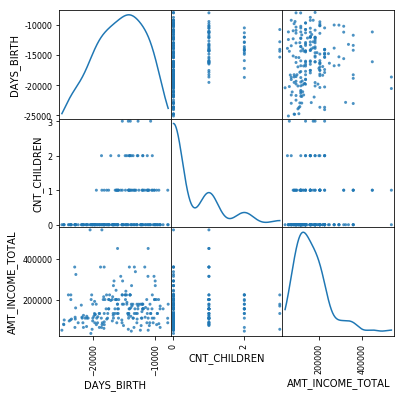

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(app_train2, alpha=0.8, figsize=(6, 6), diagonal='kde')

## alpha 是透明度(介於 0~1)，figsize 是圖片的大小，單位是英寸(width, hight)， diagonal 有兩種， 一個是 hist(直方圖)，另一個是 kde (核方圖)

* 看更多 [link](https://blog.csdn.net/wangxingfan316/article/details/80033557)

Text(0.5, 0, 'AMT_INCOME_TOTAL')

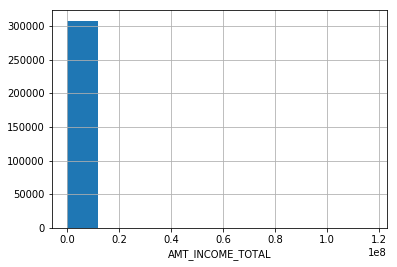

In [16]:
app_train['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

### 注意到該欄位的最大值和 75% 百分位數的值有異常大的差距，所以直接畫直方圖會看不出所以然來，可以先過濾掉再重新畫圖來看

Text(0.5, 0, 'AMT_INCOME_TOTAL')

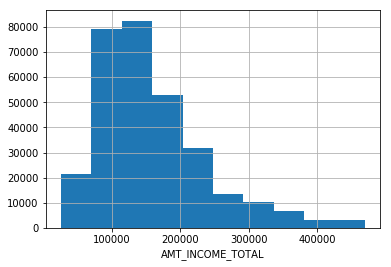

In [17]:
app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

In [18]:
help(app_train['AMT_INCOME_TOTAL'].quantile)

q99 = app_train['AMT_INCOME_TOTAL'].quantile(0.99) ## 分位數
print(q99)

Help on method quantile in module pandas.core.series:

quantile(q=0.5, interpolation='linear') method of pandas.core.series.Series instance
    Return value at the given quantile.
    
    Parameters
    ----------
    q : float or array-like, default 0.5 (50% quantile)
        0 <= q <= 1, the quantile(s) to compute
    interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
        .. versionadded:: 0.18.0
    
        This optional parameter specifies the interpolation method to use,
        when the desired quantile lies between two data points `i` and `j`:
    
            * linear: `i + (j - i) * fraction`, where `fraction` is the
              fractional part of the index surrounded by `i` and `j`.
            * lower: `i`.
            * higher: `j`.
            * nearest: `i` or `j` whichever is nearest.
            * midpoint: (`i` + `j`) / 2.
    
    Returns
    -------
    quantile : float or Series
        if ``q`` is an array, a Series will be returned where 

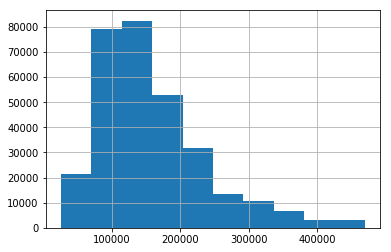

In [19]:
app_train.loc[app_train['AMT_INCOME_TOTAL']<q99]['AMT_INCOME_TOTAL'].hist()